## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [7]:
not_line_up = 1928 + 1965
not_line_up

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[df[['group', 'landing_page']].apply(lambda x: x[0] == 'control' and x[1] == 'old_page' or x[0] == 'treatment' and x[1] == 'new_page', axis=1)]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated()].count()

user_id         1
timestamp       1
group           1
landing_page    1
converted       1
dtype: int64

In [13]:
repeated_one = df2[df2.user_id.duplicated()|df2.user_id.duplicated()]

c. What is the row information for the repeat **user_id**? 

In [14]:
repeated_one

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates(subset='user_id', keep='first')
df2[df2['user_id'].duplicated()].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
cont = df2.query('group == "control"')['converted'].mean()
cont

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
trea = df2.query('group == "treatment"')['converted'].mean()
trea

0.11880806551510564

In [19]:
diff = trea - cont
diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [20]:
df2_groupby = df2.groupby('landing_page').count()
df2_groupby

,user_id,timestamp,group,converted
landing_page,,,,
new_page,145310,145310,145310,145310
old_page,145274,145274,145274,145274


In [21]:
new_pag_prob = df2_groupby.user_id.iloc[0]/(df2_groupby.user_id.iloc[0] + df2_groupby.user_id.iloc[1])
new_pag_prob

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

- The original proportion of users converted was 0.11965919355605512.
- After we clean up the data, the conversion rate became 0.11959708724499628.
- The conversion in the 'control group' with 'Old Page' is 0.1203863045004612.
- The conversion in the 'treatment group' with 'New Pate' is 0.11880806551510564.

The results in the two portions are close to each other. Therefore, we need more evidences to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



### **$H_{0}$** : **$p_{new}$** - **$p_{old}$** ≤ 0  


### **$H_{1}$** : **$p_{new}$** - **$p_{old}$** > 0  


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(1, p_new, n_new)
tsm = new_page_converted.mean()
tsm

0.11950313123666643

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, p_old, n_old)
csm = old_page_converted.mean()
csm

0.12088880322700551

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
sim_diff = tsm - csm
sim_diff

-0.0013856719903390796

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old, n_old)
    csm_b = old_page_converted.mean()
    new_page_converted = np.random.binomial(1, p_new, n_new)
    tsm_b = new_page_converted.mean()
    p_diffs.append(tsm_b - csm_b)

In [30]:
p_diffs = np.array(p_diffs)
p_diffs.mean()

-5.3563261893904745e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

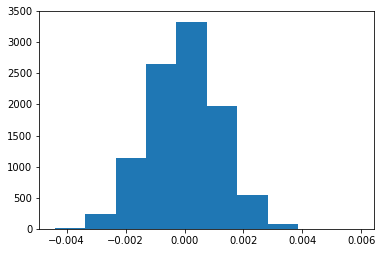

In [31]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
cont_con = df2.query('group == "control"')['converted'].mean()
treat_con = df2.query('group == "treatment"')['converted'].mean()
obs_diff = treat_con - cont_con
obs_diff

-0.0015782389853555567

In [33]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.90310000000000001

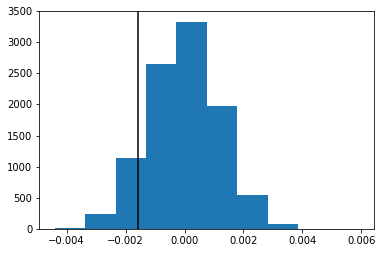

In [34]:
plt.hist(p_diffs, alpha=1)
plt.axvline(x=obs_diff, color='black')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- In part j, we tried to calculate and find what proportion of the p_diffs are greater than the actual difference observed in ab_data.csv. In other words, it is the actual difference in conversion rate between the control group and the treatment group, not the simulated difference. The p_value is 0.9042.

- We found the definition of the p_value in scientific studies from StatesDirect(https://www.statsdirect.com/help/basics/p_values.htm). "The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis ($H_{0}$) of a study question is true – the definition of ‘extreme’ depends on how the hypothesis is being tested. P is also described in terms of rejecting $H_{0}$ when it is actually true, however, it is not a direct probability of this state."

- We found that a p_value of 0.9042. It means that 90.42% of the differences can be generated accidentally. However, it was just a simulation. It's not the actual data.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
print(convert_old)

17489


In [37]:
print(convert_new)

17264


In [38]:
print(n_old)

145274


In [39]:
print(n_new)

145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- We found that z_score is 1.31 and p_Value is 0.90. Because the z_score is 1.31, we can guess that this value lies between the 1st and 2nd standare deviations. Also, we can know that this value puts the p_value in the distribution. Also, a p_value is 0.90505831. Because p_value is bigger that 0.05, we should accept the null hypothesis. In other words, the old_page is the same or bigger than the new_page.  

- Yes, they agree with the findings in parts j and k. In the ztest, the value was 0.9051. In the simulation, it was 0.9042.   

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should use a logistic regression model because we have a dependent variable based on categories. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2c = df2.copy()
df2c.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [42]:
df2c[['group_1', 'group_2']] = pd.get_dummies(df2c.group)
df2c[['lp1', 'lp2']] = pd.get_dummies(df2c.landing_page)
df2c = df2c.rename(columns={'group_2': 'ab_page', 'lp1': 'treatment'})
df2c = df2c.drop(['timestamp', 'group', 'landing_page', 'lp2', 'group_1', 'treatment'], axis=1)

In [43]:
df2c.head()

,user_id,converted,ab_page
0,851104,0,0
1,804228,0,0
2,661590,0,1
3,853541,0,1
4,864975,1,0


In [44]:
df2c['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [45]:
model = sm.Logit(df2c['converted'], df2c[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        17:21:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
np.exp(-1.9888)

0.13685955841614492

In [48]:
np.exp(-0.0150)

0.98511193960306265

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

- The p_value associated with ab_page is 0.19.
- It is different from the value we found in Part II because of our intention. In part II, we intentionally made a hypothesis that would be tested in only one way because we wanted to prove that the 'Alternate Hypothesis' is True. We didn't consider the fact that the new_page can be worse than the old_page. In short, the hypothesis in PartII is a one-tailed test while the Part III was a two-tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- In my opinion, it is a good idea to consider other factors to add into the regression model. It's because we can select the muptiple comparison method when we want the estimate the differences between specific groups. Also, when we want to test many hypotheses, we can use this method by considering other elements that might influence whether or not an individual convets. In statistical studies, the definition of the multiple comparisons is and it is from NIST(https://www.itl.nist.gov/div898/handbook/prc/section4/prc47.htm). "One popular way to investigate the cause of rejection of the null hypothesis is a Multiple Comparison Procedure. These are methods which examine or compare more than one pair of means or proportions at the same time." 
- However, if there are too many variables we can consider, some of them can be related to each other. It may make us hard to make approprate tests and interpret them.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [49]:
df_c = pd.read_csv('./countries.csv')

In [50]:
df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [51]:
cdf = df2c.merge(df_c, on='user_id', how='inner')
cdf.head()

,user_id,converted,ab_page,intercept,country
0,851104,0,0,1,US
1,804228,0,0,1,US
2,661590,0,1,1,US
3,853541,0,1,1,US
4,864975,1,0,1,US


In [52]:
cdf.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [53]:
cdf[['CA', 'UK', 'US']] = pd.get_dummies(cdf['country'])
cdf = cdf.drop(['country', 'CA'], axis=1)

In [54]:
cdf.head()

,user_id,converted,ab_page,intercept,UK,US
0,851104,0,0,1,0,1
1,804228,0,0,1,0,1
2,661590,0,1,1,0,1
3,853541,0,1,1,0,1
4,864975,1,0,1,0,1


In [55]:
model = sm.Logit(cdf['converted'], cdf[['intercept', 'ab_page', 'UK', 'US']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:               2.323e-05
Time:                        17:21:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [56]:
np.exp(-0.0149)

0.9852104557227469

In [57]:
np.exp(0.0506)

1.0519020483004984

In [58]:
np.exp(0.0408)

1.0416437559600236

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
df_int = cdf.copy()
df_int.head()

,user_id,converted,ab_page,intercept,UK,US
0,851104,0,0,1,0,1
1,804228,0,0,1,0,1
2,661590,0,1,1,0,1
3,853541,0,1,1,0,1
4,864975,1,0,1,0,1


In [60]:
model = sm.Logit(df_int['converted'], df_int[['intercept', 'ab_page', 'UK', 'US']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:               2.323e-05
Time:                        17:21:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [61]:
df_int['UK_ab_page'] = df_int['UK'] * df_int['ab_page']
df_int['US_ab_page'] = df_int['US'] * df_int['ab_page']
df_int = df_int.drop('intercept', axis=1)
df_int.head()

,user_id,converted,ab_page,UK,US,UK_ab_page,US_ab_page
0,851104,0,0,0,1,0,0
1,804228,0,0,0,1,0,0
2,661590,0,1,0,1,0,1
3,853541,0,1,0,1,0,1
4,864975,1,0,0,1,0,0


In [62]:
df_int.corr(method='spearman')

,user_id,converted,ab_page,UK,US,UK_ab_page,US_ab_page
user_id,1.000000,0.001769,-0.001745,-0.002059,0.001187,-0.002814,0.000217
converted,0.001769,1.000000,-0.002432,0.001772,-0.000237,0.001827,-0.002563
ab_page,-0.001745,-0.002432,1.000000,-0.002092,0.001216,0.376626,0.734811
UK,-0.002059,0.001772,-0.002092,1.000000,-0.881979,0.653496,-0.423595
US,0.001187,-0.000237,0.001216,-0.881979,1.000000,-0.576370,0.480278
UK_ab_page,-0.002814,0.001827,0.376626,0.653496,-0.576370,1.000000,-0.276818
US_ab_page,0.000217,-0.002563,0.734811,-0.423595,0.480278,-0.276818,1.000000


We wanted to check whether people from the UK like the new_page while people from the US like the old page. Although we couldn't find any p_value which is significant, we could find that there is a correlation between 'US_ab_page' and 'ab_page'. The value was 0.734811.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0